In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')


In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
num_labels = len(np.unique(y_train))

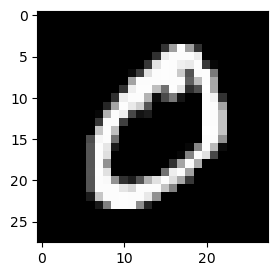

In [13]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[1],cmap='gray');

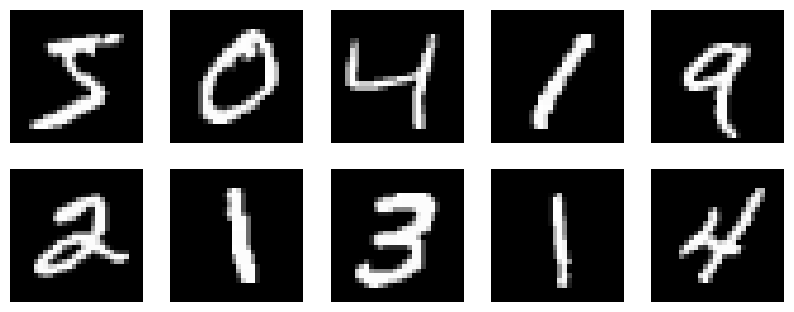

In [14]:
def visualize_img(data):
    plt.figure(figsize=(10,10))
    for n in range(10):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(data[n], cmap='gray')
        plt.axis('off')
visualize_img(X_train)

In [15]:
#Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [19]:
model = tf.keras.Sequential({
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=128, activation='relu', name='layer1'),
    Dense(units=num_labels, activation='softmax', name='output_layer')
})

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [29]:
history=model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9286 - loss: 0.2521 - precision: 0.9421 - recall: 0.9178 - val_accuracy: 0.9235 - val_loss: 0.2730 - val_precision: 0.9376 - val_recall: 0.9122
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9287 - loss: 0.2551 - precision: 0.9428 - recall: 0.9168 - val_accuracy: 0.9192 - val_loss: 0.2777 - val_precision: 0.9369 - val_recall: 0.9076
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9312 - loss: 0.2475 - precision: 0.9451 - recall: 0.9197 - val_accuracy: 0.9259 - val_loss: 0.2724 - val_precision: 0.9388 - val_recall: 0.9150
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9333 - loss: 0.2410 - precision: 0.9457 - recall: 0.9217 - val_accuracy: 0.9245 - val_loss: 0.2709 - val_precision: 0.9401 - val_recall: 0.9138
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9321 - loss: 0.2424 - precision: 0.9459 - recall: 0.9205 - val_accuracy: 0.9262 - va

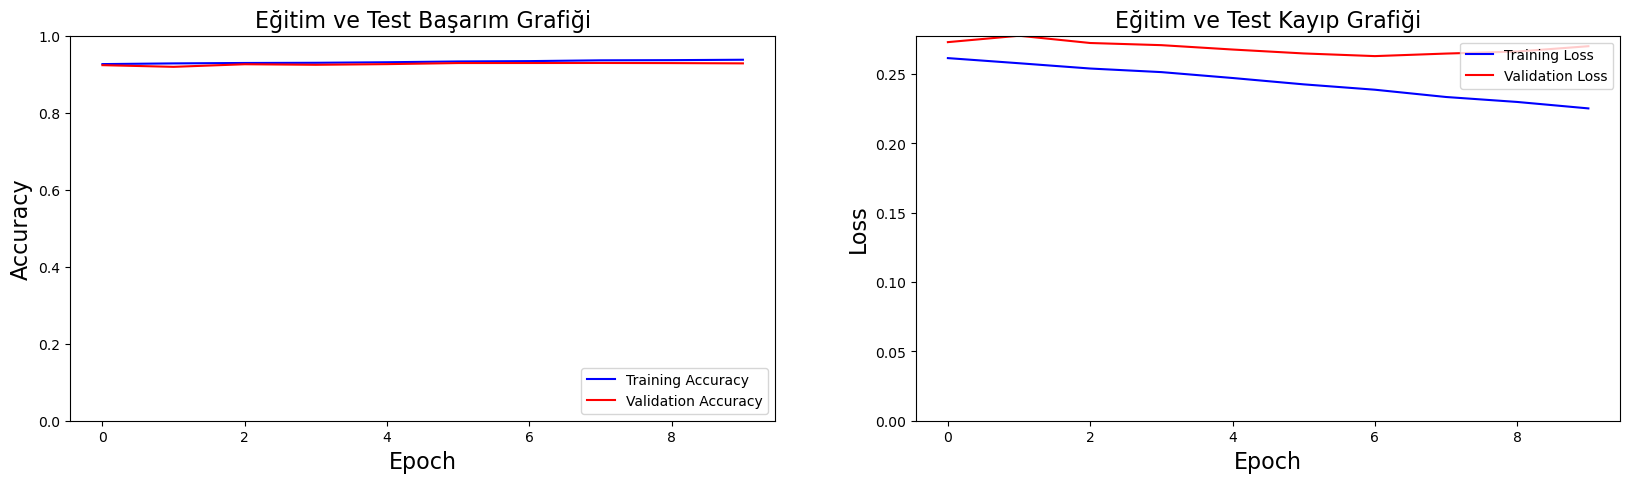

In [30]:
plt.figure(figsize=(20, 5))

# Grafik 1: Eğitim ve Doğrulama Başarımı
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1])  # Accuracy 0 ile 1 arasında olduğu için sabit sınır
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)

# Grafik 2: Eğitim ve Doğrulama Kaybı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])  # Loss için dinamik üst sınır
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)

plt.show()

In [32]:
import keras
keras.saving.save_model(model, 'my_model.keras')

In [35]:
loss, precision, recall, acc = model.evaluate(X_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 92.8%

Test Loss: 27.0%

Test Precision: 94.0%

Test Recall: 92.1%
